In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from alienlab.utils import pandas_to_arrays
from mvgavg import mvgavg
import alienlab.plot, alienlab.regression_func
from alienlab.utils import marker, linestyle
from matplotlib import cm
p = alienlab.plot.PlotFigure()
p.extension = ".pdf"
p.date = False
p.save_folder = "G:/DREAM/from_github/thesis/Intensity_paper/"


In [44]:
import chart_studio
import plotly.tools as tls
import chart_studio.plotly as py

from scipy.optimize import curve_fit

def fit_gauss(x,y, color):
    # Define model function to be used to fit to the data above:
    def gauss(x, *p):
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))

    # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
    p0 = [1., color, 1.]

    coeff, var_matrix = curve_fit(gauss, x, y, p0=p0)

    # Get the fitted curve
    ypred = gauss(x, *coeff)

    #plt.plot(x, y, label='Test data')
    #plt.plot(x, ypred, label='Fitted data')

    # Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
    print('Fitted mean = ', coeff[1])
    print('Fitted standard deviation = ', coeff[2])
    
    return coeff



Fitted mean =  403.99039080063113
Fitted standard deviation =  6.666556610136245
Fitted mean =  468.8966557419894
Fitted standard deviation =  10.280721053888259
Fitted mean =  631.6347491969522
Fitted standard deviation =  6.711376959271897
Fitted mean =  549.2327260172138
Fitted standard deviation =  5.911405171715148
['Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3' 'Unnamed: 4'
 'red_60mv' 'Unnamed: 6' 'Unnamed: 7' 'Unnamed: 8' 'red 10mV']
Fitted mean =  627.5428530146073
Fitted standard deviation =  11.388666182147583


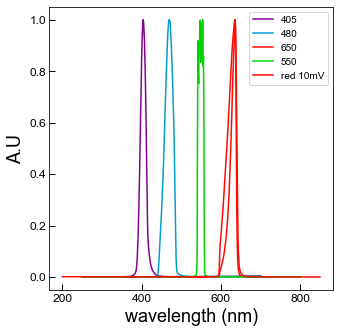

In [55]:
headers, spectrum = alienlab.utils.pandas_to_arrays("spectra/LEDs.csv")
p.xlabel  = "wavelength (nm)"
p.ylabel= "A.U"
fig = p.set_figure("%d", "%0.1f")
colors = [405, 480, 0, 650, 550]
cmap = cm.nipy_spectral(np.linspace(0,1,320))

funcs = {}
for i in range(len(headers)//2):
    if colors[i] != 0:
        x = spectrum[i*2]
        y = spectrum[i*2+1]/np.max(spectrum[i*2+1])
        coeff = fit_gauss(x,y, colors[i])

        plt.plot(x, y, label =  headers[2*i+1], color = cmap[colors[i]-380])
        funcs[colors[i]] = alienlab.regression_func.get_func(x,y, 5)

        
headers, spectrum = alienlab.utils.pandas_to_arrays("spectra/led_rouge.csv")
print(headers)
x = spectrum[2]
y = spectrum[3]
y=y/y.max()
coeff = fit_gauss(x,y, colors[i])

plt.plot(x, y, label =  headers[2*i+1], color = cmap[650-380])

plt.legend()

In [29]:
colors = cm.nipy_spectral(np.linspace(0,1,1000))


In [30]:
headers, table = pandas_to_arrays("spectra/fluo_chlamy.csv")
headers

array(['wl0', 'emission_exc480', 'wl1', 'excitation_em690', 'wl2',
       'blank'], dtype=object)

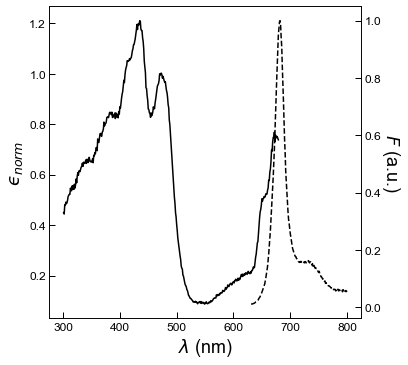

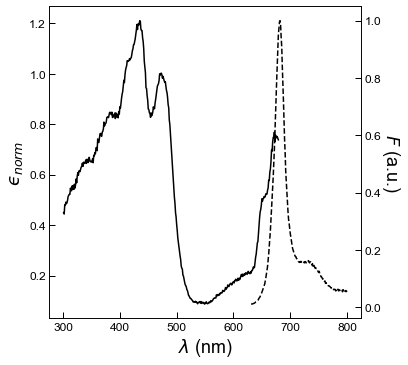

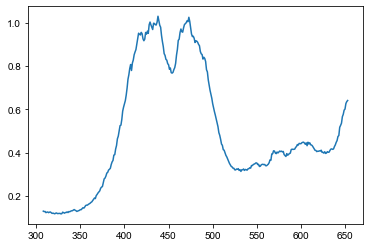

<Figure size 432x288 with 0 Axes>

In [56]:
p.xlabel = r'$\lambda$ (nm)'
p.ylabel = r'$ϵ_{norm}$'

        
        
fig = p.set_figure("%d", "%0.1f", figsize=(13+3, 13), label_right=True)

ax1= plt.gca()
ind = (table[2]>300)*(table[2]<680)
x = np.array(table[2])[ind]
y = np.array(table[3])[ind]
pos_norm = 470
y = y/y[x==pos_norm]
np.save("spectra/spectra_chlamy.npy", np.array([x,y]))
ax1.plot(x, y, "-k", label = headers[3])
ind = (table[0]>630)#*(table[0]<680)
x = np.array(table[0])[ind]
y = np.array(table[1])[ind]

ax2 = ax1.twinx()
ax2.set_ylabel(r'$F$ (a.u.)', fontsize = p.fontsize, rotation = 270, labelpad = 20)
ax2.tick_params(labelsize = p.fonttick, length = p.fonttick//2, which = 'major', width = p.linewidth//2, direction = "in")
ax2.plot(x, y/y.max(), "--k", label = headers[1])

x, y = np.load("spectra/spectrum_N_16.npy", allow_pickle=True)
ind = x<680
y=y[ind]
y = y/y[x==pos_norm]
plt.figure()
plt.plot(x, y)
np.save("spectra/spectra_leaf.npy", np.array([x,y]))

#plt.plot(x[ind], y, '-.k')
#plt.legend(prop = {"size":15})

df = pd.read_csv('../FOLDER_2022_07_29_OJIP_leaf/spectra/thylakoid_excitation_prospect.csv', header = None,sep = ";", decimal = ",")
x = df[0].values
y = df[1].values

norm = np.mean(y[(x>460)*(x<480)])
y = y/norm
ind = (x>300)*(x<680)
#plt.plot(x[ind], y[ind], ',k')
np.save("spectra/spectra_thylakoid.npy", np.array([x[ind],y[ind]]))


p.save_name = "spectra_chlamy"
p.saving(fig)
#fig_px = tls.mpl_to_plotly(fig)
#py.plot(fig_px, filename = 'excitation_chlamydomonas', auto_open=True)

301.0
400.0
308.0


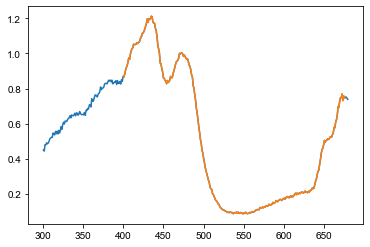

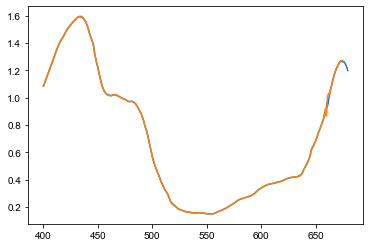

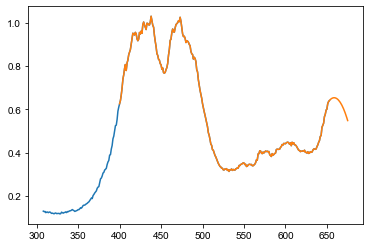

In [7]:
X,Y = [],[]
xref = np.linspace(400, 675, 675-400+1)
files = ["spectra/spectra_chlamy.npy", "spectra/spectra_thylakoid.npy", "spectra/spectra_leaf.npy"]
for f in files:
    plt.figure()
    x,y = np.load(f)
    func = alienlab.regression_func.get_func(x,y, 2)
    plt.plot(x,y)
    print(x[0])
    plt.plot(xref, func(xref))

    Y.append(func(xref))
Y_specs = np.array(Y)
mean = np.mean(Y_specs, axis = 0)
np.save("spectra/spectra_average.npy", np.array([xref,mean]))
std = np.std(Y_specs, axis = 0)
np.save("spectra/spectra_average_std.npy", np.array([xref, std])) 

In [8]:
dico = {405:[], 470:[], 550:[], 640:[]}
for k in dico.keys():
    v = Y_specs[:,(xref>k-10)*(xref<k+10)]
    dico[k] = (np.mean(v), np.std(v))
dico
np.save('spectra/excitation_dic_average.npy', dico)
dico

{405: (0.9910904383996194, 0.2055027461629725),
 470: (0.9767319066295361, 0.03615564346408253),
 550: (0.19553278688828116, 0.10627977740947671),
 640: (0.42909947209999333, 0.11549595360986975)}

In [9]:
for l in [405, 470, 550, 640]:
    print("m", mean[xref==l])
    print("s", std[xref==l])
    
np.mean(std)

m [0.96019261]
s [0.17746115]
m [1.00187294]
s [0.00264874]
m [0.19780076]
s [0.1112081]
m [0.40595785]
s [0.08683379]


0.12250460373486453

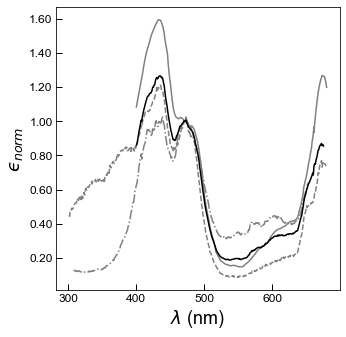

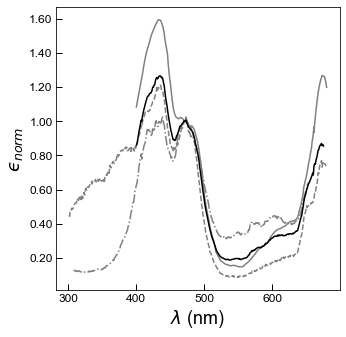

<Figure size 432x288 with 0 Axes>

In [57]:
X,Y = [],[]
xref = np.linspace(400, 680, 680-400+1)
files = ["spectra/spectra_chlamy.npy", "spectra/spectra_leaf.npy", "spectra/spectra_thylakoid.npy", "spectra/spectra_average.npy"]
p.xlabel = r'$\lambda$ (nm)'
fig = p.set_figure("%d", "%0.2f")

for i, f in enumerate(files):
    x,y = np.load(f)
    func = alienlab.regression_func.get_func(x,y, 5)
    if i<3:
        plt.plot(x,y, linestyle[i], color = 'grey')
    else:
        plt.plot(x,y, '-k')

p.save_name = "average_spectrum"
p.saving(fig)


In [11]:
headers, table = pandas_to_arrays("spectra/excitation_leaf_2022_08_01.csv")
headers

array(['Unnamed: 0', 'Blank_750', 'Unnamed: 2', 'Mesure_750',
       'Unnamed: 4', 'Mesure_690', 'Unnamed: 6', 'Blank_690'],
      dtype=object)

In [12]:
spectrum = table[5]/table[7]
np.std(spectrum[:-20])/np.mean(spectrum[:-20])

0.6000644407338573

1805.6049760490948


Text(0, 0.5, 'fluorescence exctation')

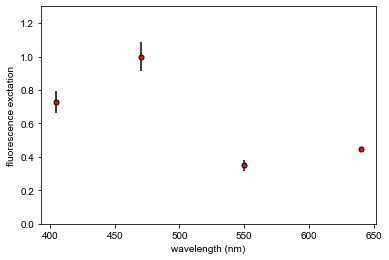

In [13]:
dico = {405:[], 470:[], 550:[], 640:[]}
for N in range(3, 30):
    
    #spectrum = table[3][N//2:-N//2+1]/mvgavg(table[1], N)
    #x = table[0][N//2:-N//2+1]

    spectrum = table[5][:-20][N//2:-N//2+1]/mvgavg(table[7][:-20], N)
    spectrum = spectrum
    
    x = table[4][0:-20][N//2:-N//2+1]
    p.xlabel = 'wavelength (nm)'
    p.ylabel = 'fluorescence'
    fig = p.set_figure(formatx = "%d", formaty = "%0.1f")
    plt.plot(x, spectrum, "k", label = 'normalized excitation spectrum')
    np.save("spectra/spectrum_N_%d.npy"%N, np.array([x, spectrum]))
    plt.savefig("G:/DREAM/from_github/thesis/Figures/OJIP/spectrum_leaf.png")
    for lbd in dico.keys():
        ind = np.where(x==lbd)[0][0]
        dico[lbd].append(np.mean(spectrum[ind-4:ind+4]))
    plt.close("all")
M = np.mean(dico[470])
print(M)
for lbd in dico.keys():
    dico[lbd]/=M
    
for lbd in dico.keys():
    plt.errorbar(lbd, np.mean(dico[lbd]), yerr = 3*np.std(dico[lbd])/np.mean(dico[470]),  marker='o', mfc='red',
         ms=5, linestyle="", color = "k")

plt.ylim(0, 1.3)
plt.xlabel("wavelength (nm)")
plt.ylabel("fluorescence exctation")

In [14]:
np.save('spectra/excitation_dic_leaf.npy', dico)

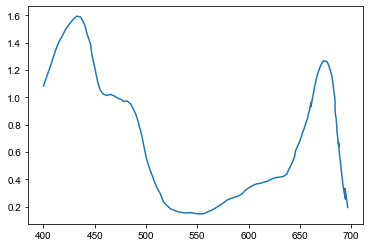

In [15]:
df = pd.read_csv('spectra/thylakoid_excitation_prospect.csv', header = None,sep = ";", decimal = ",")
x = df[0].values
y = df[1].values

norm = np.mean(y[(x>460)*(x<480)])
y = y/norm

plt.plot(x,y)


In [16]:
dico = {405:[], 470:[], 550:[], 640:[]}
for k in dico.keys():
    v = y[(x>k-10)*(x<k+10)]
    dico[k] = (np.mean(v), np.std(v))
dico
np.save('spectra/excitation_dic_thylakoid.npy', dico)

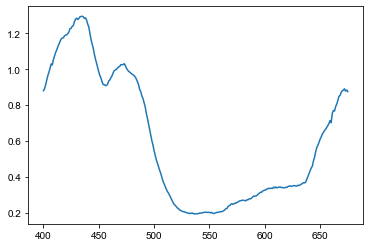

In [17]:
x,y = np.load("spectra/spectra_average.npy")
norm = np.mean(y[(x>460)*(x<480)])
y = y/norm

plt.plot(x,y)


In [18]:
dico = {405:[], 470:[], 550:[], 640:[]}
for k in dico.keys():
    v = y[(x>k-10)*(x<k+10)]
    dico[k] = (np.mean(v), np.std(v))
dico
np.save('spectra/excitation_dic_average.npy', dico)

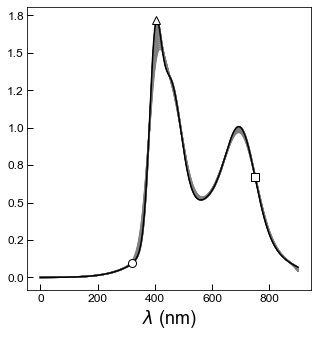

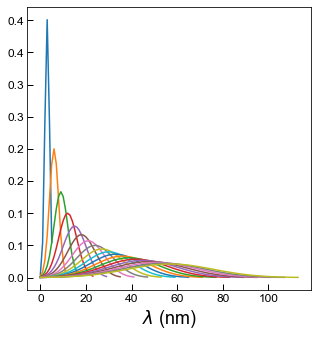

In [39]:
p.xlabel = r'$\lambda$ (nm)'
p.ylabel = ''
fig = p.set_figure(formatx = "%d", formaty = "%0.1f")
ax1 = plt.gca()
fig2 = p.set_figure("%d", "%0.1f")
ax2 = plt.gca()

Y = []
WL = np.array([320, 405, 750])


def gaussian(x, mu, sig):
    return np.exp(-(x - mu)**2 / (2 * sig**2))

N = 900
x = np.linspace(0, N, N+1)
y = gaussian(x, 400, 20) + gaussian(x, 450, 40) + 0.5*gaussian(x, 600, 150) + 0.6*gaussian(x, 700, 50) 

#x, y = np.load("../FOLDER_2022_07_29_OJIP_LEAF/spectra/spectra_chlamy.npy")
Y.append(y)
M = 20

for sig in range(1,M):
    xg = np.linspace(0, 6*sig-1, 6*sig)
    g = gaussian(xg, 3*sig, sig)
    g /= g.sum()
    ax2.plot(xg, g)
    yg = np.convolve(y, g, 'same')
    ax1.plot(x, yg , "grey", label = 'normalized excitation spectrum')
    Y.append(yg)
ax1.plot(x, y, "k")
for q, wl in enumerate(WL):
    ax1.plot(x[x==wl], y[x==wl], ["o", "^", "s"][q], markersize=8, markeredgecolor="k", color = "w")

#plt.legend()
fig.savefig("G:/DREAM/from_github/thesis/Intensity_paper/" + "convolved_spectrum_bwmax_%d"%M + p.extension)

Y = np.array(Y)


In [40]:
np.std(np.sum(vec, axis = 1))

0.016158889296846723

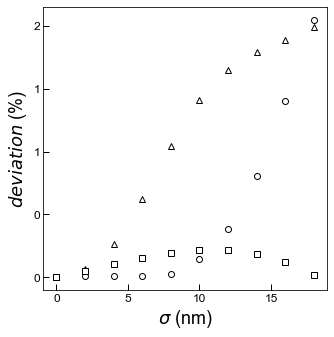

In [41]:
p.xlabel = r'$\sigma$ (nm)'
p.ylabel = '$deviation$ (%)'
fig = p.set_figure("%d", "%d")


for q, peak in enumerate(WL):
    for k in range(len(Y)):
        if k%2==0:
            start,stop = peak-3*k, peak+3*k

            vec = np.array([Y[0, start:stop],Y[k, start:stop]])
            #plt.plot(vec[0])
            #plt.plot(vec[1])
            #std = np.std(vec, axis = 0)*100
            std = np.std(np.sum(vec, axis = 1))
            plt.plot(k,(np.mean(std)), ["o", "^", "s"][q], markeredgecolor="k", color = "w")

plt.savefig("G:/DREAM/from_github/thesis/Intensity_paper/" + "deviation_bwmax_%d"%M + p.extension)


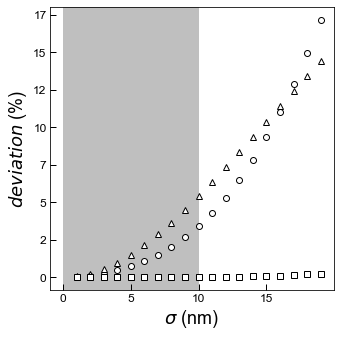

In [42]:
fig = p.set_figure("%d", "%d")

for q, wl in enumerate(WL): 
    for sig in range(1, M):
        I = np.exp(-(x-wl)**2/(2*sig**2))/(sig*np.sqrt(2*np.pi))
        vg = 2.3 * np.sum(I*y)
        vm = 2.3  * y[x==wl][0]
        
        plt.plot(sig, np.abs(vm-vg)/max(vm, vg)*100,  ["o", "^", "s"][q], markeredgecolor="k", color = "w")
        #plt.plot(sig, vg,  ["o", "^", "s"][q], markeredgecolor="k", color = "w")
        #plt.plot(sig, vm,  ["o", "^", "s"][q], markeredgecolor="r", color = "w")
ax = plt.gca()
ax.axvspan(0, 10, facecolor='grey', alpha=0.5)
    
plt.savefig("G:/DREAM/from_github/thesis/Intensity_paper/" + "deviation_bwmax_%d"%M + p.extension)
 

In [107]:
max(vm, vg)

0.21393060136091493